In [99]:
# Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
%matplotlib inline

In [100]:
# Importing the Boston Housing dataset
data = pd.read_csv(r"D:\Batool\sync_Intern\Buston_Price_Prediction\data\boston.csv")

In [101]:
data = pd.DataFrame(data)


In [102]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [103]:
data.shape


(506, 14)

In [104]:
#cleaning
#if any coloumn has null value
data.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [105]:
#if we have duplicated rows (boolean)
data.duplicated().any()

False

In [106]:
#categorial(object) to numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [107]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


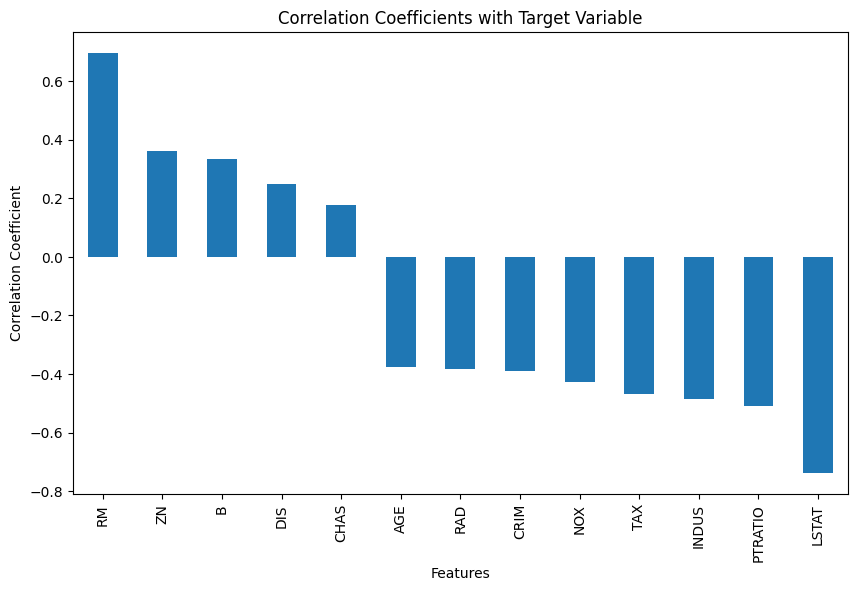

Features with weak correlations: ['DIS', 'CHAS']


In [108]:
x= data.drop(['MEDV'], axis=1)
y= data.MEDV

# Calculate the correlation coefficients between features and the target variable
correlations = x.corrwith(pd.Series(y))
correlations = correlations.sort_values(ascending=False)

# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation Coefficients with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

# Identify features with weak correlations (absolute value < threshold)
threshold = 0.3
weakly_correlated_features = correlations[abs(correlations) < threshold].index.tolist()
print("Features with weak correlations:", weakly_correlated_features)


In [109]:
# drop features with weak correlation (less than 0.3)
x.drop(['CHAS','DIS'], axis=1,inplace =True)

In [110]:
x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,396.90,5.33


In [111]:
#Data preprocessing: Standardize the input features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [112]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=0.20, shuffle = True, random_state = 2)


In [113]:
# 1. Polynomial Features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create and train the Linear Regression model with polynomial features
reg_model_poly = LinearRegression()
reg_model_poly.fit(x_train_poly, y_train)

# Evaluate the model with polynomial features
y_pred_poly = reg_model_poly.predict(x_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Linear Regression with Polynomial Features  - Mean Squared Error (MSE):", mse_poly)
print("Linear Regression with Polynomial Features - R-squared (R2):", r2_poly)



Linear Regression with Polynomial Features  - Mean Squared Error (MSE): 12.094326857192161
Linear Regression with Polynomial Features - R-squared (R2): 0.855434223639243


In [114]:
# Create and train the SVR model
svr_model = SVR(kernel='linear', C=0.3, epsilon=0.1)
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR - Mean Squared Error (MSE):", mse_svr)
print("SVR - R-squared (R2):", r2_svr)

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor - Mean Squared Error (MSE):", mse_rf)
print("Random Forest Regressor - R-squared (R2):", r2_rf)

# Create and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=150, random_state=2)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor - Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting Regressor - R-squared (R2):", r2_gb)


# Create and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression - Mean Squared Error (MSE):", mse_lasso)
print("Lasso Regression - R-squared (R2):", r2_lasso)





SVR - Mean Squared Error (MSE): 21.558682995850603
SVR - R-squared (R2): 0.7423049846914624
Random Forest Regressor - Mean Squared Error (MSE): 8.42280894117646
Random Forest Regressor - R-squared (R2): 0.8993205716947035
Gradient Boosting Regressor - Mean Squared Error (MSE): 7.4182725848419615
Gradient Boosting Regressor - R-squared (R2): 0.9113279847529792
Lasso Regression - Mean Squared Error (MSE): 20.98863837385551
Lasso Regression - R-squared (R2): 0.749118835872439


In [115]:
models = pd.DataFrame({
    'Model': ['GradientBoostingRegressor', 'RandomForestRegressor', 'SVR','Lasso'],
    'R-squared Score': [r2_gb*100, r2_rf*100, r2_svr*100,r2_lasso*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
0,GradientBoostingRegressor,91.132798
1,RandomForestRegressor,89.932057
3,Lasso,74.911884
2,SVR,74.230498


In [116]:
Ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='LeakyReLU', input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
initial_learning_rate = 0.001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=1000,
#     decay_rate=0.96,
#     staircase=True
# )
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
Ann_model.compile(loss='huber_loss', optimizer=optimizer, metrics=[tf.keras.metrics.MeanAbsoluteError(), tfa.metrics.RSquare()])
history = Ann_model.fit(x_train, y_train, epochs=200, batch_size=32, 
                    validation_data=(x_test, y_test), verbose=1)

# Evaluate the model on the test set
y_pred_ann = Ann_model.predict(x_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print("Ann Regression - Mean Squared Error (MSE):", mse_ann)
print("Ann Regression - R-squared (R2):", r2_ann)


Epoch 1/200
13/13 [==============================] - 1s 20ms/step - loss: 21.3559 - mean_absolute_error: 21.8559 - r_square: -5.6595 - val_loss: 20.8973 - val_mean_absolute_error: 21.3973 - val_r_square: -5.5075
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 19.4462 - mean_absolute_error: 19.9460 - r_square: -4.7697 - val_loss: 18.1243 - val_mean_absolute_error: 18.6218 - val_r_square: -4.2103
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 16.1372 - mean_absolute_error: 16.6336 - r_square: -3.2887 - val_loss: 13.7181 - val_mean_absolute_error: 14.2161 - val_r_square: -2.1280
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 10.5266 - mean_absolute_error: 11.0170 - r_square: -1.1312 - val_loss: 6.4600 - val_mean_absolute_error: 6.9442 - val_r_square: 0.1142
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 5.8453 - mean_absolute_error: 6.3284 - r_square: 0.1140 - val_loss: 5.3568 - val_mean

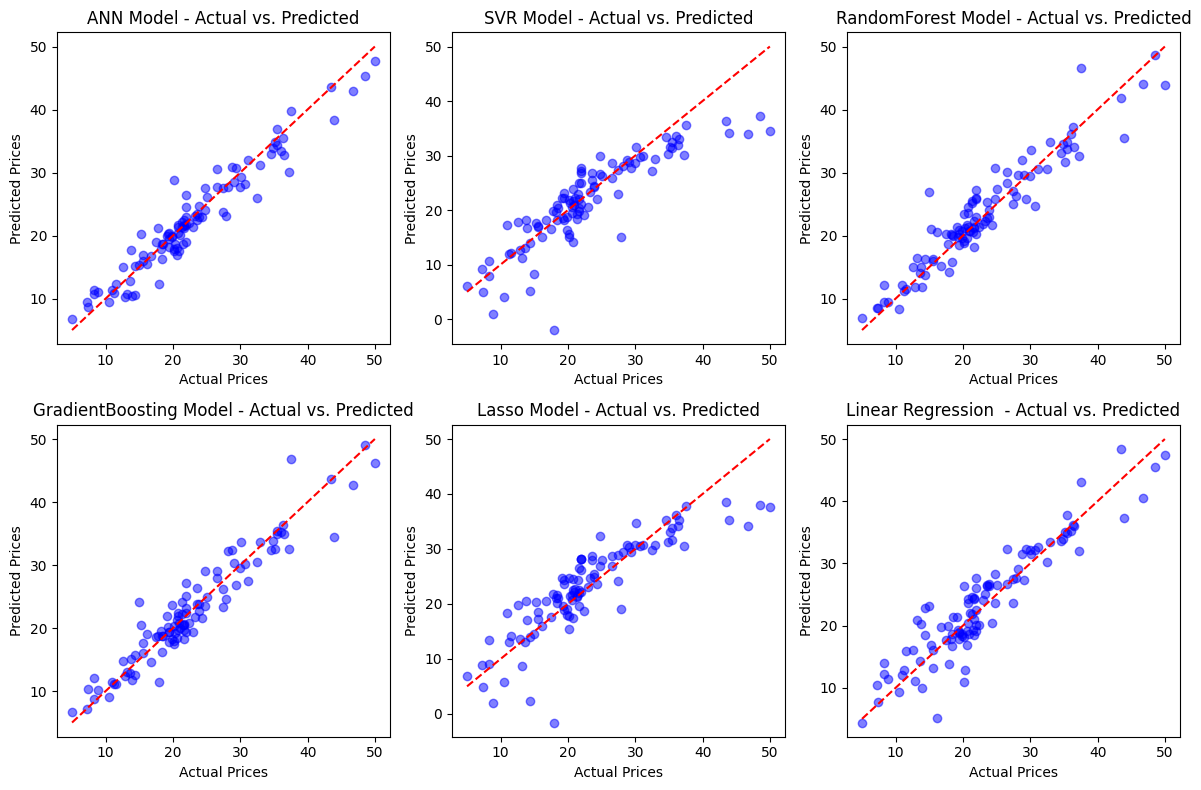

In [117]:
def visualize_predictions(y_actual, y_pred, model_name, plot_num):
    # Create a scatter plot to visualize the differences
    plt.subplot(2, 3, plot_num)
    plt.scatter(y_actual, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} - Actual vs. Predicted')

# Example usage:
plt.figure(figsize=(12, 8))

# Ann_model:
visualize_predictions(y_test, y_pred_ann, "ANN Model", 1)

# SVR model:
visualize_predictions(y_test, y_pred_svr, "SVR Model", 2)

# RandomForest model:
visualize_predictions(y_test, y_pred_rf, "RandomForest Model", 3)

# GradientBoosting model:
visualize_predictions(y_test, y_pred_gb, "GradientBoosting Model", 4)

# Lasso model:
visualize_predictions(y_test, y_pred_lasso, "Lasso Model", 5)

#Linear Regression with Polynomial Features :
visualize_predictions(y_test, y_pred_poly, "Linear Regression ",6)

plt.tight_layout()
plt.show()
